## 1. Data loading

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import math

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.titlesize']=12
mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12


%matplotlib inline 

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
BASEPATH = os.path.join('input')
TRAIN_PATH = os.path.join(BASEPATH, 'train.csv')
TEST_PATH = os.path.join(BASEPATH, 'test.csv')

In [6]:
train = pd.read_csv(TRAIN_PATH)

## 2. Data exploration

In [7]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [9]:
print("Train size :",len(train))

Train size : 1458644


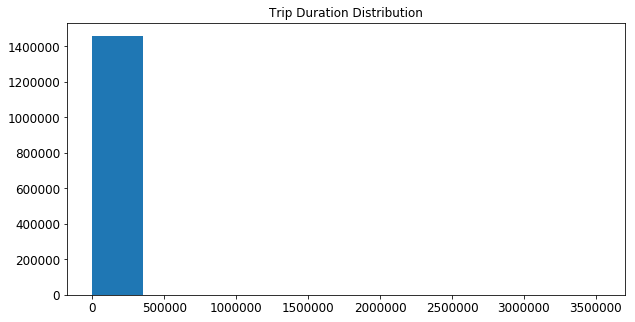

In [10]:
mpl.rcParams['figure.figsize']=(10,5)

plt.hist(train['trip_duration'])
plt.title("Trip Duration Distribution");

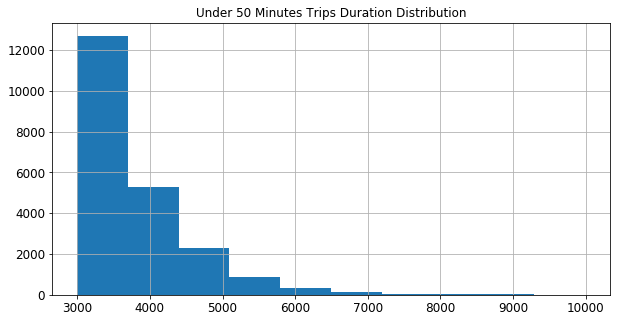

In [11]:
train.trip_duration[train['trip_duration'] > 3000][train['trip_duration'] < 10000].hist()
plt.title("Under 50 Minutes Trips Duration Distribution");

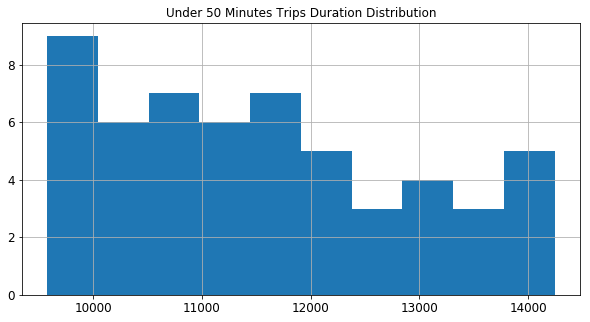

In [12]:
train.trip_duration[train['trip_duration'] > 9500][train['trip_duration'] < 15000].hist()
plt.title("Under 50 Minutes Trips Duration Distribution");

In [13]:
test = pd.read_csv(TEST_PATH)
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [14]:
train.dtypes, test.dtypes

(id                     object
 vendor_id               int64
 pickup_datetime        object
 dropoff_datetime       object
 passenger_count         int64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
 store_and_fwd_flag     object
 trip_duration           int64
 dtype: object, id                     object
 vendor_id               int64
 pickup_datetime        object
 passenger_count         int64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
 store_and_fwd_flag     object
 dtype: object)

In [15]:
NUM_VARS = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'pickup_latitude',
           'dropoff_longitude', 'dropoff_latitude']
CAT_VARS = ['pickup_datetime','dropoff_datetime', 'store_and_fwd_flag']

## 3. Data preprocessing

### 3.1 Outliers 

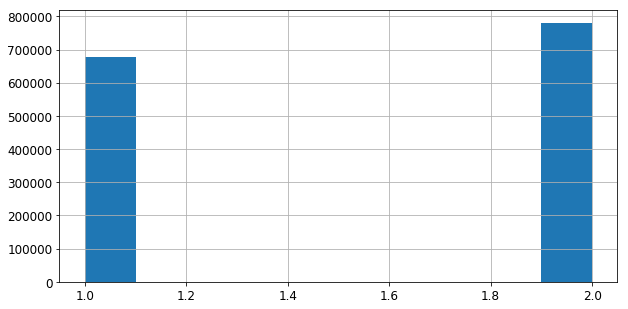

In [16]:
train['vendor_id'].hist();

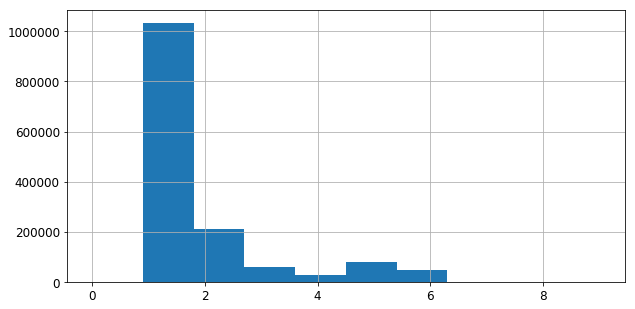

In [17]:
train['passenger_count'].hist();

### Outliers : Pick-up location

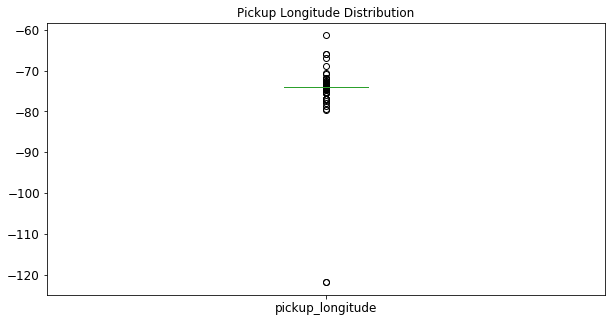

In [18]:
train['pickup_longitude'].plot.box()
plt.title("Pickup Longitude Distribution");

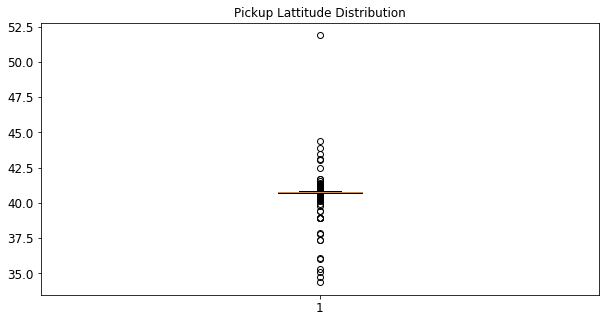

In [19]:
plt.boxplot(train['pickup_latitude'])
plt.title("Pickup Lattitude Distribution");

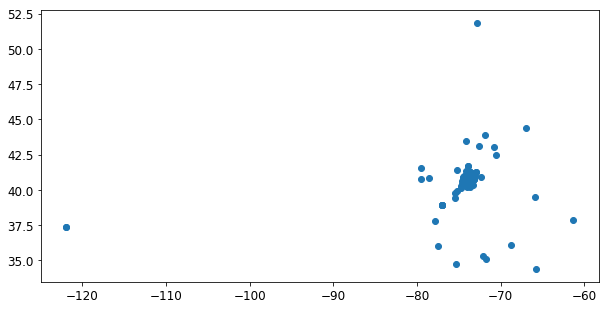

In [20]:
plt.scatter(train['pickup_longitude'],train['pickup_latitude']);

[-74.02, -73.92, 40.7, 40.82]

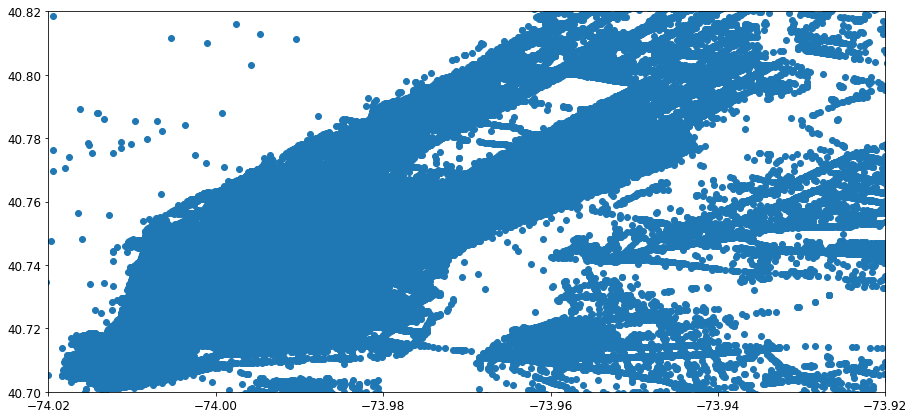

In [21]:
mpl.rcParams['figure.figsize']=(15,7)
plt.scatter(train['pickup_longitude'],train['pickup_latitude'])
plt.axis([-74.02,-73.92,40.7,40.82])

On drop les quelques outliers larges sur les positions de récupération.

#### Outliers : Pick-up location, par rapport à la longitude : 

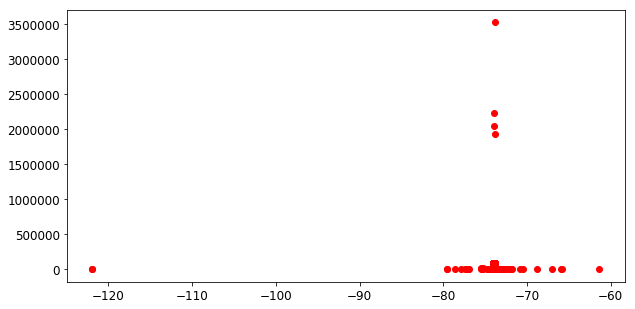

In [65]:
mpl.rcParams['figure.figsize']=(10,5)
plt.scatter(train['pickup_longitude'],train['trip_duration'],color='r');

/Users/Dilva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


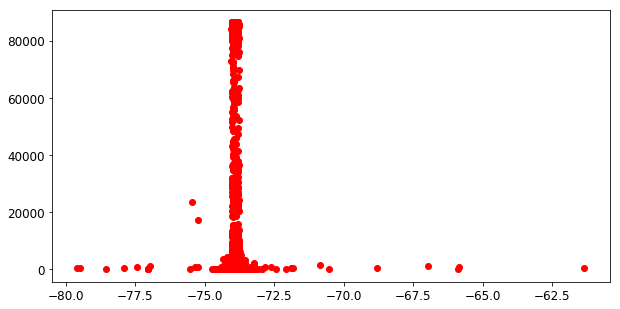

In [66]:
train2 = train[train['pickup_longitude'] > -80][train['pickup_longitude'] < -60]
train2 = train2[train2['trip_duration'] <= 500000]
plt.scatter(train2['pickup_longitude'],train2['trip_duration'],color='r');

/Users/Dilva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


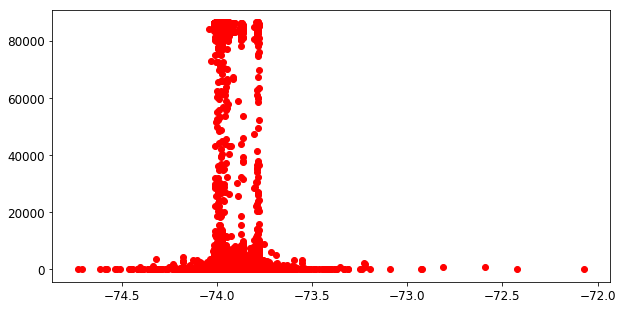

In [67]:
train2 = train2[train2['pickup_longitude'] > -75][train2['pickup_longitude'] < -72]
plt.scatter(train2['pickup_longitude'],train2['trip_duration'],color='r');

#### Outliers : Pick-up location par rapport à la latitude

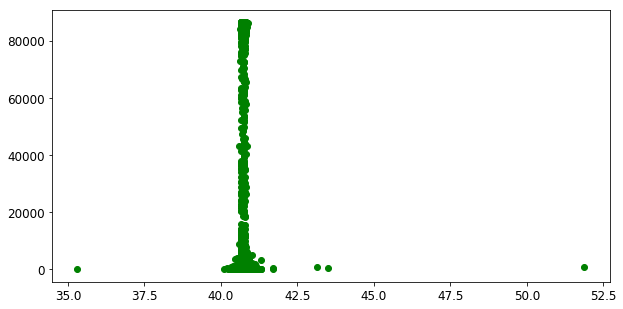

In [69]:
plt.scatter(train2['pickup_latitude'],train2['trip_duration'],color='g');

/Users/Dilva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


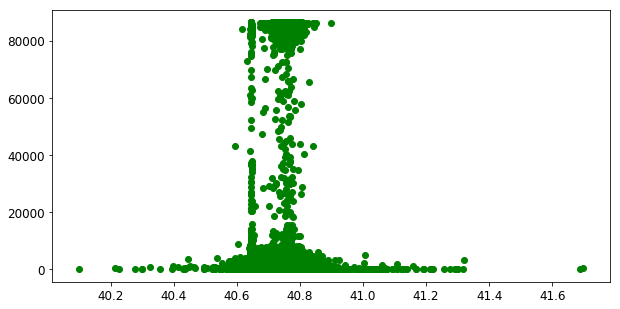

In [70]:
train2 = train2[train2['pickup_latitude'] < 42][train2['pickup_latitude'] > 39]
plt.scatter(train2['pickup_latitude'],train2['trip_duration'],color='g');

#### Finalement :

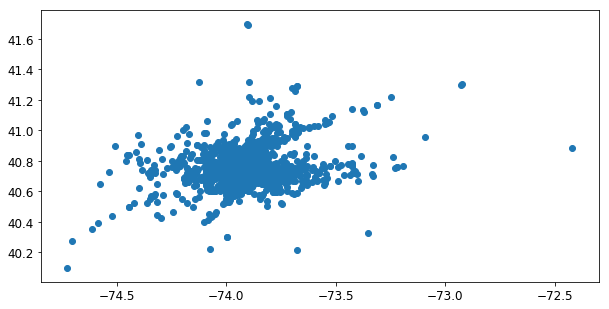

In [57]:
plt.scatter(train2['pickup_longitude'],train2['pickup_latitude']);

### Drop-off location

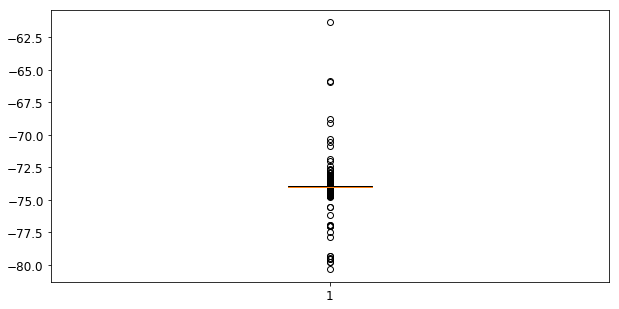

In [23]:
mpl.rcParams['figure.figsize']=(10,5)
plt.boxplot(train2['dropoff_longitude']);

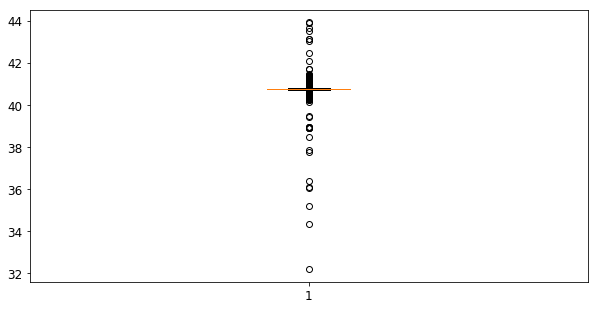

In [24]:
plt.boxplot(train2['dropoff_latitude']);

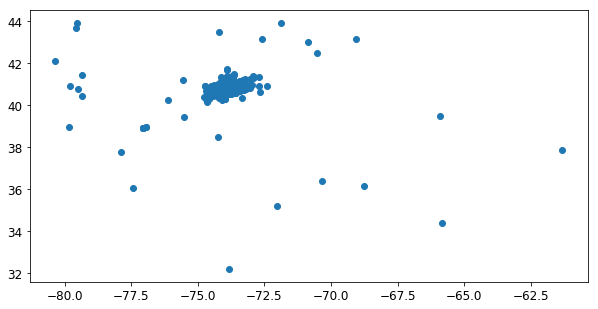

In [25]:
plt.scatter(train2['dropoff_longitude'],train2['dropoff_latitude']);

[-74.02, -73.92, 40.7, 40.82]

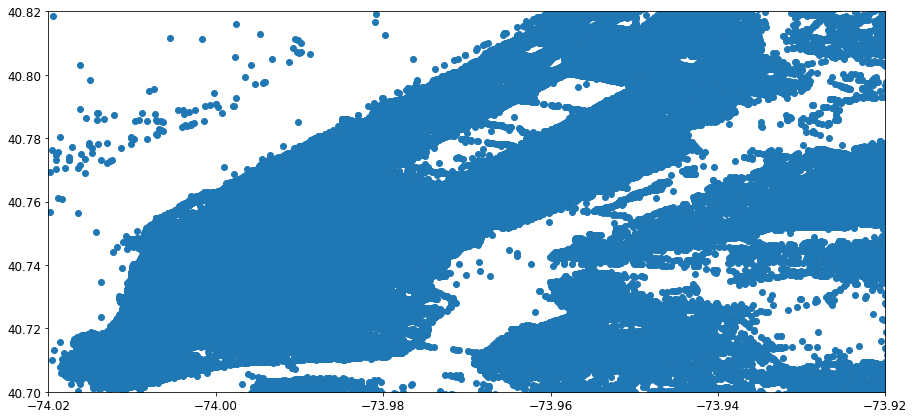

In [26]:
mpl.rcParams['figure.figsize']=(15,7)
plt.scatter(train2['dropoff_longitude'],train2['dropoff_latitude'])
plt.axis([-74.02,-73.92,40.7,40.82])

#### Même chose ces outliers
#### Drop-off location et longitude

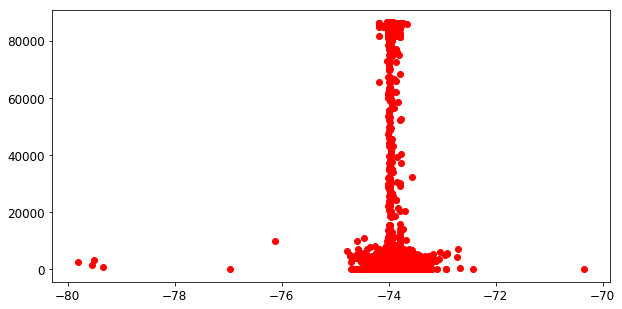

In [71]:
mpl.rcParams['figure.figsize']=(10,5)
plt.scatter(train2['dropoff_longitude'],train2['trip_duration'],color='r');

/Users/Dilva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


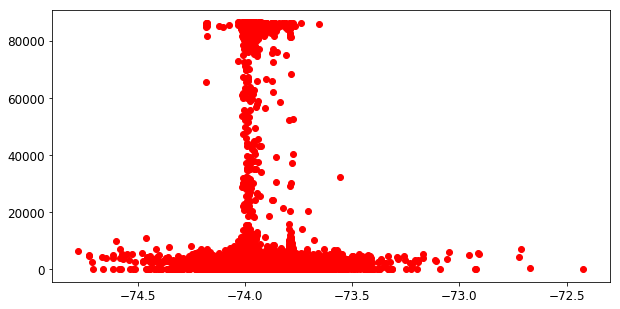

In [72]:
train2 = train2[train2['dropoff_longitude'] > -76][train2['dropoff_longitude'] < -72]
plt.scatter(train2['dropoff_longitude'],train2['trip_duration'],color='r');

#### Drop-off location et latitude

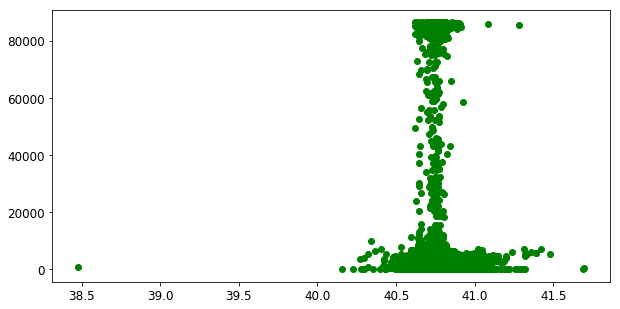

In [73]:
plt.scatter(train2['dropoff_latitude'],train2['trip_duration'],color='g');

/Users/Dilva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


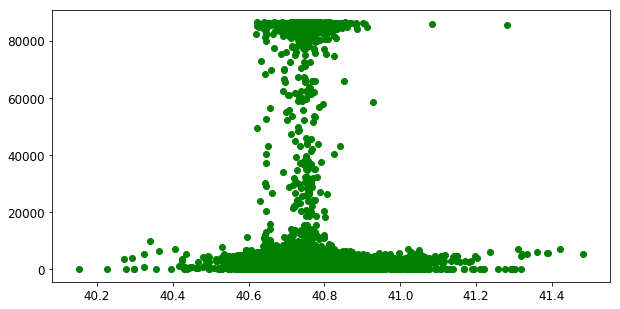

In [74]:
train2 = train2[train2['dropoff_latitude'] > 40][train2['dropoff_latitude'] < 41.5]
plt.scatter(train2['dropoff_latitude'],train2['trip_duration'],color='g');

 #### Finalement :

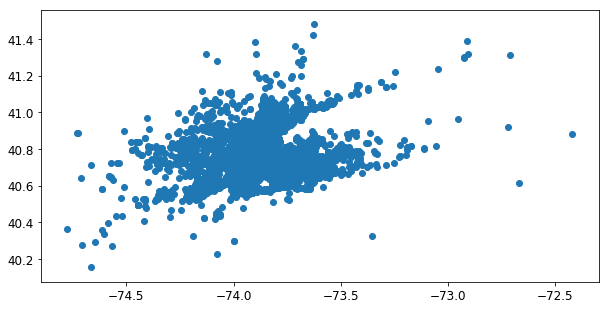

In [64]:
plt.scatter(train2['dropoff_longitude'],train2['dropoff_latitude']);

### 3.2 Missing values 

In [63]:
missing_val_count = (train2.isnull().sum())
missing_val_count

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### 3.3 Categorical Data

In [145]:
# train
for column in CAT_VARS:
    train2[column] = train2[column].astype('category').cat.codes
train2.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,551657,551444,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,id2377394,1,1242673,1242826,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,id3858529,2,132895,132992,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,id3504673,2,730903,730707,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,id2181028,2,643812,643596,1,-73.973053,40.793209,-73.972923,40.782520,0,435


In [32]:
# test
for column in CAT_VARS:
    if(column != 'dropoff_datetime'):
        test[column] = test[column].astype('category').cat.codes
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,610580,1,-73.988129,40.732029,-73.990173,40.756680,0
1,id3505355,1,610579,1,-73.964203,40.679993,-73.959808,40.655403,0
2,id1217141,1,610578,1,-73.997437,40.737583,-73.986160,40.729523,0
3,id2150126,2,610577,1,-73.956070,40.771900,-73.986427,40.730469,0
4,id1598245,1,610576,1,-73.970215,40.761475,-73.961510,40.755890,0


### 3.4 Log-transformation

In [89]:
train2.dtypes

id                     object
vendor_id               int64
pickup_datetime         int32
dropoff_datetime        int32
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag       int8
trip_duration           int64
dtype: object

In [146]:
train3 = np.abs(train2[['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag']]) 
train3 = np.log1p(train3)
train3.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,1.098612,13.220684,0.693147,4.317250,3.732129,4.317016,3.732073,0.0
1,0.693147,14.032776,0.693147,4.317227,3.731425,4.317481,3.731248,0.0
2,1.098612,11.797322,0.693147,4.317208,3.732033,4.317559,3.730743,0.0
3,1.098612,13.502037,0.693147,4.317622,3.730980,4.317652,3.730662,0.0
4,1.098612,13.375164,0.693147,4.317129,3.732734,4.317127,3.732478,0.0


## 4. Features

In [148]:
X_train = train3
X_train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,1.098612,13.220684,0.693147,4.317250,3.732129,4.317016,3.732073,0.0
1,0.693147,14.032776,0.693147,4.317227,3.731425,4.317481,3.731248,0.0
2,1.098612,11.797322,0.693147,4.317208,3.732033,4.317559,3.730743,0.0
3,1.098612,13.502037,0.693147,4.317622,3.730980,4.317652,3.730662,0.0
4,1.098612,13.375164,0.693147,4.317129,3.732734,4.317127,3.732478,0.0


In [149]:
y_train = np.log1p(train2['trip_duration'])
y_train.head()

0    6.122493
1    6.498282
2    7.661527
3    6.063785
4    6.077642
Name: trip_duration, dtype: float64

## 6. Model 

Scaling des données et entraînement : 

In [150]:
t_X, val_X, t_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state = 0)

In [151]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(t_X)

In [152]:
X_val_scaled = scaler.transform(val_X)

In [153]:
rf = RandomForestRegressor(random_state=1, n_jobs=-1)
rf.fit(X_train_scaled, t_y)
preds = rf.predict(X_val_scaled)

In [154]:
print(np.sqrt(MSLE(np.exp(val_y), np.exp(preds))))

0.46884639053573773


Cross Validation :

In [120]:
cv_preds = cross_val_predict(rf, X_train, y_train, cv=10, n_jobs=-1)

In [123]:
print(cv_preds)

print(np.sqrt(MSLE(np.exp(y_train), np.exp(cv_preds))))

[6.33402229 6.46412967 7.21904244 ... 7.05597196 5.89950917 5.16583869]
0.4684108282116968


## 8. Predictions

In [132]:
test_p = np.log1p(np.abs(test[['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag']]))
test_scaled = scaler.transform(test_p)

In [133]:
preds = rf.predict(test_scaled)
np.exp(preds)

array([ 903.64213993,  509.23395961,  612.20511958, ..., 1778.05532407,
       1651.71771176, 1070.91847625])

In [134]:
sub = pd.DataFrame({'id':test.id,'trip_duration':np.exp(preds)})
sub.head(5)

,id,trip_duration
0,id3004672,903.642140
1,id3505355,509.233960
2,id1217141,612.205120
3,id2150126,1122.584990
4,id1598245,448.417153


In [135]:
sub.to_csv('submission.csv', index=0)